<h1>Exam 1<h1>

<h2>Optimal Portfolio Allocation<h2>

# Question 1

**Solution for Question 1 (a)**


$\begin{aligned}
\min_{\vec{\omega}} \frac{1}{2} \vec{\omega}^T \vec{\Sigma} \vec{\omega} ,
\qquad s.t.
\quad r + \vec{\omega}^T (\vec{\mu} - r \vec{1}) = m
\end{aligned}$

Lagrangian function

$\begin{aligned}
V(\vec{\omega}, \lambda) = \frac{1}{2} \vec{\omega}^T \vec{\Sigma} \vec{\omega} + \lambda (r + \vec{\omega}^T (\vec{\mu} - r \vec{1}) - m)
\end{aligned}$

first order deviation

$\begin{aligned}
& \frac {\partial V}{\partial \vec{\omega}}(\vec{\omega} ^ *, \lambda)
= \vec{\Sigma} \vec{\omega}^* + \lambda (\vec{\mu} - r \vec{1}) = 0 \\
\to \quad &
\vec{\omega}^* = \lambda \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}) \\
\end{aligned}$

Substituting the value of $\vec{\omega}^*$ into the constraint

$\begin{aligned}
& r + [\lambda \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})]^T (\vec{\mu} - r \vec{1}) = m \\
\to \quad & \lambda (\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}) = m - r \\
\to \quad & \lambda = \frac{m - r}{(\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}）} \\
\to \quad & \vec{\omega}^* = \lambda \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}) =
\frac {(m -r) \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})} {(\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})} \\
\end{aligned}$

**Solution for Question 1 (b)**

let :

$A = (\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})$

$\begin{aligned}
\vec{\omega}^* = \frac {(\mu_{\pi} - r) \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})} {(\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})} = \frac {(\mu_{\pi} - r) \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})} {A}
\end{aligned}$

get：

$\begin{aligned} \sigma_{\pi}^2 
& = \vec{\omega}^T \vec{\Sigma} \vec{\omega} \\
& = \frac{(\mu_{\pi} - r)^2}{A^2} [\vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})]^T \vec{\Sigma} [\vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}) ] \\
& = \frac{(\mu_{\pi} - r)^2}{A^2} (\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} \vec{\Sigma} \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1}) \\
& = \frac{(\mu_{\pi} - r)^2}{A}
\end{aligned}$ 

get:

$\begin{aligned} SR 
& = \frac {\mu_{\pi} - r}{\sigma_{\pi}} \\
& = \sqrt{A} \\
& = \sqrt{(\vec{\mu} - r \vec{1})^T \vec{\Sigma}^{-1} (\vec{\mu} - r \vec{1})}
\end{aligned}$

there is no relation between portfolio return $\mu_{\pi}$ and sharpe ratio

**Solution for Question 1 (b)**

expected return|risk|sharpe ratio
:-|:-|:-
5.0%|3.8%|0.53
7.5%|8.5%|0.53
10.0%|13.2%|0.53
12.5%|17.9%|0.53


sharpe ratio 0.53


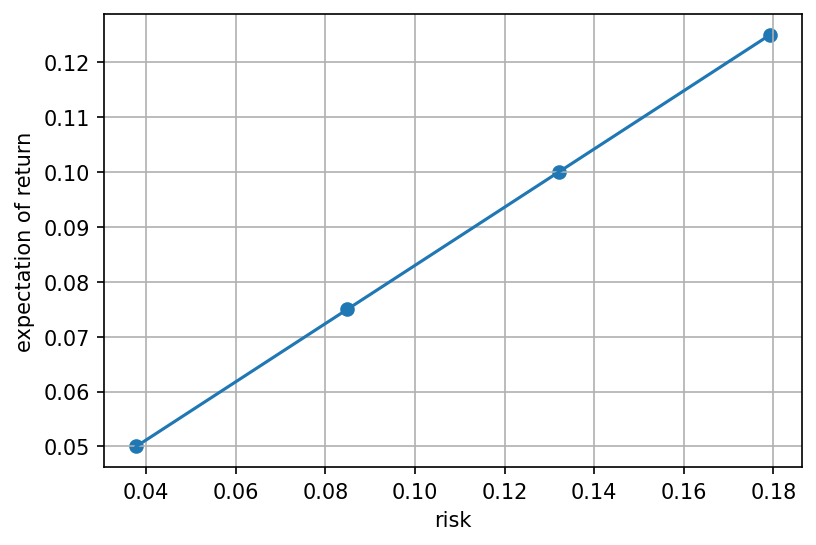

In [17]:
import numpy as np

# parameters
# expectation of returns
mean = np.mat([0.04, 0.08, 0.12, 0.15, ]).T
# standard deviation of returns (vector)
std  = np.mat([0.07, 0.12, 0.18, 0.26, ]).T
# correlation matrix of returns
R = np.mat([[1, 0.2, 0.5, 0.3, ], [0.2, 1, 0.7, 0.4, ], [0.5, 0.7, 1, 0.9, ], [0.3, 0.4, 0.9, 1, ], ])
# risk-free rate
r = 0.03

# target return list
m_list = [0.05, 0.075, 0.10, 0.125, ]
#m_list = [r + index * 0.005 for index in range(40)]
# risk list
s_list = [risk_of_portfolio_with_rfa(m, mean, std, R, r) for m in m_list ]
# sharpe ratio list
sr_list = [ (m - r) / s for m, s in zip(m_list, s_list)]

data = [
    ('expected return', ['{:.1f}%'.format(m * 100) for m in m_list], ),
    ('risk', ['{:.1f}%'.format(s * 100) for s in s_list]),
    ('sharpe ratio',  ['{:.2f}'.format(sr) for sr in sr_list]),
]
_print_table('**Solution for Question 1 (b)**', data)

print('sharpe ratio {:.2f}'.format(sharpe_ratio(mean, std, R, r)))

# plot Efficient Frontier
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.scatter(s_list, m_list)
plt.plot(s_list, m_list)
plt.xlabel('risk')
plt.ylabel('expectation of return')
plt.grid()
plt.show()

# Question 2

In [3]:
import numpy as np

# parameters
# expectation of returns
mean = np.mat([0.0, 0.0, 0.0, ]).T
# standard deviation of returns (vector)
std  = np.mat([0.30, 0.20, 0.15, ]).T
# correlation matrix of returns
R = np.mat([[1, 0.8, 0.5, ], [0.8, 1, 0.3, ], [0.5, 0.3, 1, ], ])
# weights of asset
w = np.mat([0.5, 0.2, 0.3, ]).T
# confidence level
c = 0.99

s_var, s_es = var_and_es_sentivity(mean, std, R, w, c)

# output solution
def _fmt(mat) :
    return list(map(lambda x : '{:5.0f}%'.format(x* 100), mat.T.A[0]))
data = [
    ('Asset', [str(i) for i in range(1, len(mean) + 1)], ),
    ('VaR sensitivities wrt', _fmt(s_var), ),
    ('ES sensitivities wrt',  _fmt(s_es), ),
]
_print_table('**Solution for Question 2**', data)

**Solution for Question 2**

Asset|VaR sensitivities wrt|ES sensitivities wrt
:-|:-|:-
1|  -68%|  -78%
2|  -39%|  -44%
3|  -22%|  -25%


<h2>Regulation and Techniques</h2>

# Question 3

**Solution for Question 3**

rolling window|(a) percentage of VaR breaches|(b) number of consecutive breaches
:-|:-|:-
21|1.09%|[5 start at 2011-08-04] <br> [2 start at 2010-05-06] <br> [2 start at 2012-05-17] 
42|1.09%|[6 start at 2011-08-04] <br> [3 start at 2010-05-05] 


**using the rolling window of 21 returns to compute 𝜎**

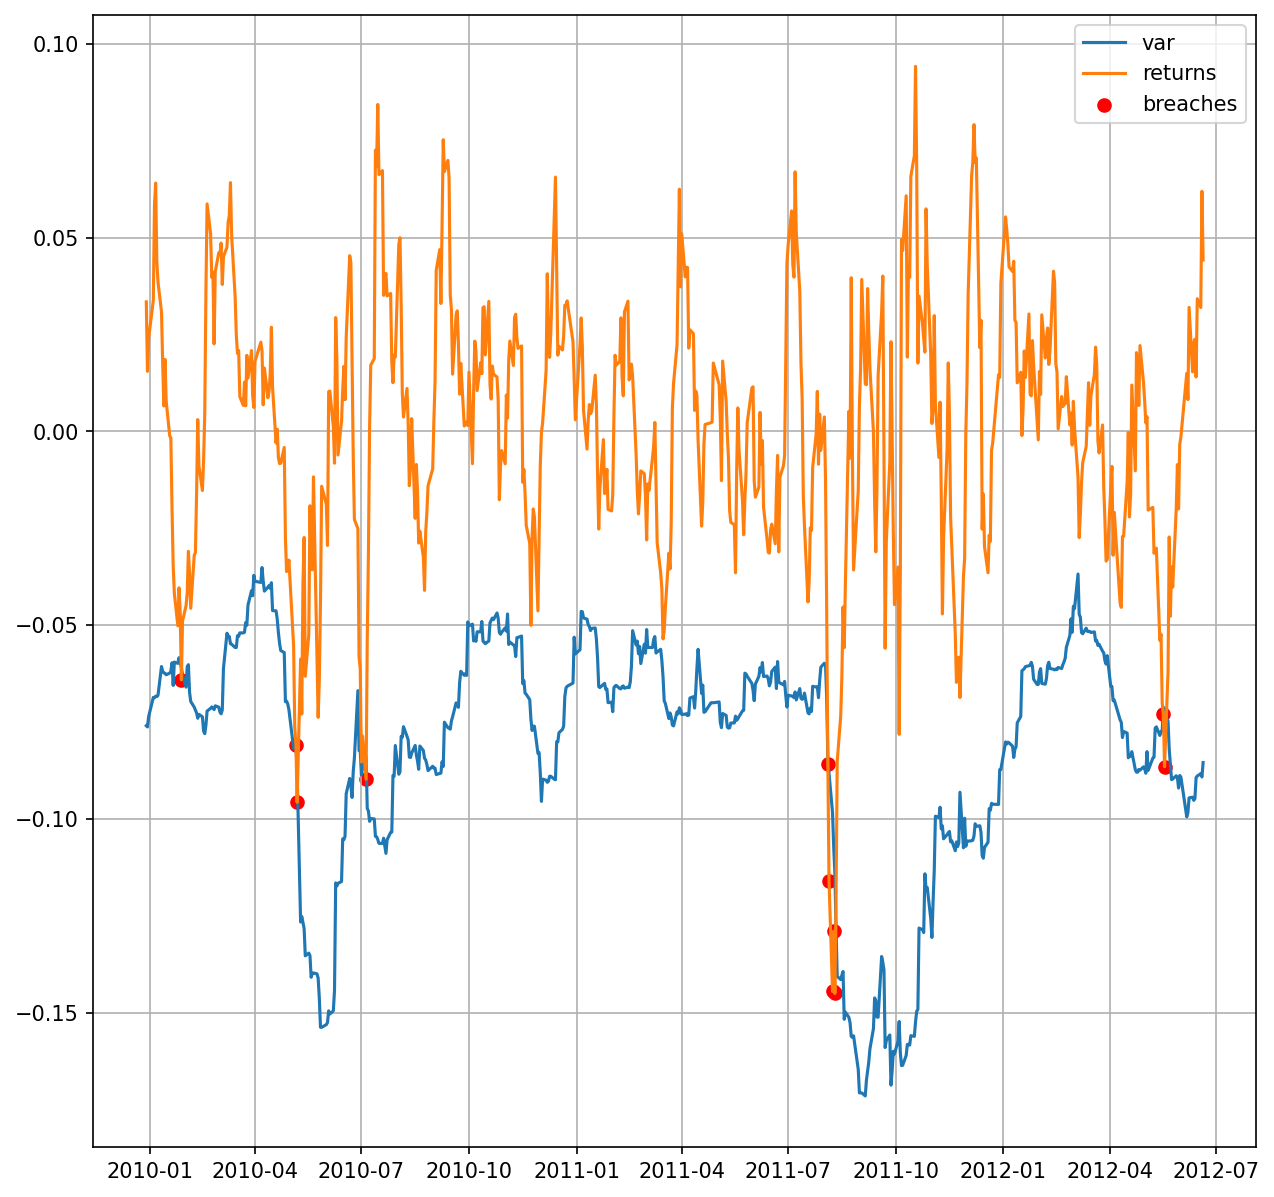

**using the rolling window of 42 returns to compute 𝜎**

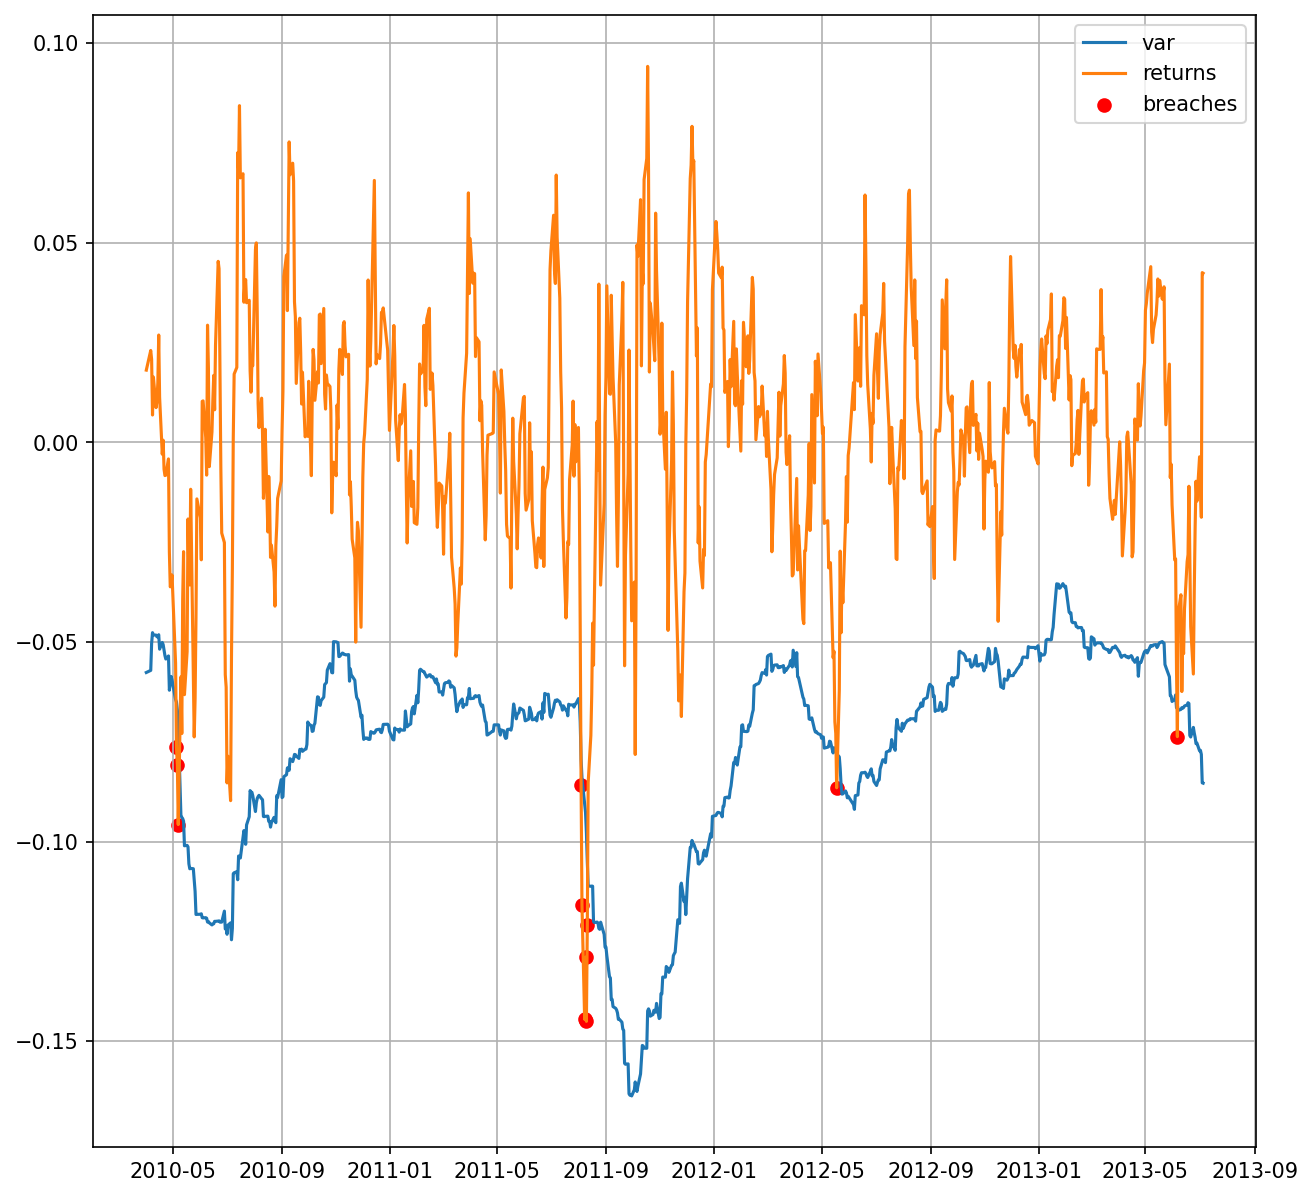

In [8]:
import os
from datetime import datetime
import xlrd
import math
import pandas as pd
import scipy.stats as stats

inverse_normal_cdf = stats.norm.ppf
normal_pdf = stats.norm.pdf

# load close from excel file
ss = xlrd.open_workbook('Data_FTSE100.xlsx')
ss_table = ss.sheets()[0]
ss_date  = ss_table.col_values(0, 2, None)
ss_close = ss_table.col_values(1, 2, None)
# convert excel date to datetime.date
d = [datetime(*xlrd.xldate_as_tuple(d, 0)).date() for d in ss_date]

# returns of 1 day
close = pd.Series(ss_close, index=d)
close_shift1 = close.shift(1)
returns_1d = (close - close_shift1) / close_shift1

# returns of 10 days
close_shift10 = close.shift(10)
returns_10d = (close - close_shift10) / close_shift10

# standard deviation of returns (21 day rolling) 
std_21d = returns_1d.rolling(21).std()

def _cal(window) :
    # standard deviation of returns (n day rolling) 
    std = returns_1d.rolling(window).std()

    c = 0.99
    var_10d_99 = inverse_normal_cdf(1 - c) * std * np.sqrt(10)
    diff = returns_10d - var_10d_99
    breach = diff[diff < 0]

    con = {}
    cur_date, cur_count = None, 0
    for d in diff.index :
        b = diff[d]
        if b < 0 :
            if cur_date is None : cur_date = d
            cur_count += 1
        else :
            con[cur_date] = cur_count
            cur_date, cur_count = None, 0
    con = [(d, c) for d, c in con.items() if c > 1]
    con.sort(key=lambda x:x[1], reverse=True)

    start = diff.index[0]
    for index in range(20, len(diff.index)) :
        if diff[index] < 0 : break
        else : start = diff.index[index - 20]
    end = diff.index[-1]
    for index in range(len(diff.index) - 21, -1, -1) :
        if diff[index] < 0 : break
        else : end = diff.index[index + 20]

    return var_10d_99, breach, con, start, end

window_list = [21, 42, ]
result = [_cal(window) for window in window_list ]

# output solution
data = [
    ('rolling window', [str(i) for i in window_list], ),
    ('(a) percentage of VaR breaches',['{:.2f}%'.format(len(r[1])/len(close)*100) for r in result ], ), 
    ('(b) number of consecutive breaches',
     [ '<br> '.join(['[{1} start at {0}] '.format(*c) for c in r[2] ]) for r in result ], ),
]

_print_table('**Solution for Question 3**', data)

import matplotlib.pyplot as plt
for index, r in enumerate(result) :
    window, var_10d_99, breach, _, start, end = window_list[index], *r
    v = var_10d_99[start : end]
    r = returns_10d[start : end]
    _print_markdown('**using the rolling window of {} returns to compute 𝜎**'.format(window))
    plt.figure(figsize=(10, 10), dpi=150)
    plt.plot(v.index, v, label='var')
    plt.plot(r.index, r, label='returns')
    plt.scatter(breach.index, returns_10d[breach.index], color='red', label='breaches')
    plt.grid()
    plt.legend()
    plt.show()


# Question 4

**Solution for Queshtion 4**

<br>in [MAR32 - Internal models approach: backtesting and P&L attribution test requirements](https://www.bis.org/basel_framework/chapter/MAR/32.htm?inforce=20220101) 

**(a) 12**


<br>section 32.19

If any given trading desk experiences either more than **12 exceptions at the 99th percentile** or 30 exceptions at the 97.5th percentile **in the most recent 12-month period**, the capital requirement for all of the positions in the trading desk **must be determined using the standardised approach**.

**(b) Spearman correlation metric and Kolmogorov-Smirnov (KS) test metric**


<br>section 32.34

The PLA requirements are based on two test metrics:

(1)	the **Spearman correlation metric** to assess the correlation between RTPL and HPL; and

(2)	the **Kolmogorov-Smirnov (KS) test metric** to assess similarity of the distributions of RTPL and HPL.

# Question 5

**Solution for Question 5**

**(a) 510**

<br>[Article 510: Net Stable Funding Requirements](https://eba.europa.eu/regulation-and-policy/single-rulebook/interactive-single-rulebook/101657)

**(b) 377**

<br>[Article 377: Requirements for an internal model for correlation trading](https://eba.europa.eu/regulation-and-policy/single-rulebook/interactive-single-rulebook/101478)

In [11]:
import pandas as pd
import scipy.stats as stats

inverse_normal_cdf = stats.norm.ppf
normal_pdf = stats.norm.pdf

def covariance_matrix(std, R) :
    '''calculate covariance matrix

    Args :
        std  [np.matrix 1xN] standard deviation of returns (asset)
        R    [np.matrix NxN] correlation matrix of returns (asset)

    Return :
        [np.matrix NxN] covariance matrix
    '''
    # standard deviation of returns (Diagonal matrix)
    S = np.mat(np.diag(std.T.A[0]))
    # covariance matrix of returns
    return S * R * S

def risk_of_portfolio(w, cov) :
    '''calculate risk of portfolio

    Args :
        w    [np.matrix 1xN] weights of asset
        cov  [np.matrix NxN] covariance matrix

    Return :
        [float] reisk of portfolio
    '''
    return np.sqrt((w.T * cov * w).item(0, 0))

def sharpe_ratio(mean, std, R, r) :
    '''calculate sharpe ratio of portfolio with risk-free asset

    Args :
        mean [np.matrix 1xN] expectation of returns (asset)
        std  [np.matrix 1xN] standard deviation of returns (asset)
        R    [np.matrix NxN] correlation matrix of returns (asset)
        r    [float]         risk-free rate

    Return :
        [float] reisk of portfolio
    '''
    
    # unit vector
    unit = np.full(std.shape, 1)

    # inverse of covariance matrix
    cov = covariance_matrix(std, R)
    cov_reverse = cov.I

    # temporary
    X = (mean - r * unit)

    return np.sqrt((X.T * cov_reverse * X).item(0, 0))

def risk_of_portfolio_with_rfa(m, mean, std, R, r) :
    '''calculate risk of portfolio with risk-free asset

    Args :
        m    [float]         target returns of portfolio
        mean [np.matrix 1xN] expectation of returns (asset)
        std  [np.matrix 1xN] standard deviation of returns (asset)
        R    [np.matrix NxN] correlation matrix of returns (asset)
        r    [float]         risk-free rate

    Return :
        [float] reisk of portfolio
    '''

    # unit vector
    unit = np.full(std.shape, 1)

    # inverse of covariance matrix
    cov = covariance_matrix(std, R)
    cov_reverse = cov.I

    # temporary
    X = (mean - r * unit)
    # weights of asset
    w = ( (m - r) * cov_reverse * X ) / (X.T * cov_reverse * X).item(0, 0)
    # portfolio risk
    return risk_of_portfolio(w, cov)

def var_and_es_sentivity(mean, std, R, w, c) :
    '''calculate VaR and ES sensitivities wrt each asset i

    Args :
        mean [np.matrix 1xN] expectation of returns (asset)
        std  [np.matrix 1xN] standard deviation of returns (asset)
        R    [np.matrix NxN] correlation matrix of returns (asset)
        w    [np.matrix 1xN] expectation of returns (asset)
        c    [float]         confidence level

    Return :
        [np.matrix 1xN] VaR sensitivities wrt each asset i
        [np.matrix 1xN] ES  sensitivities wrt each asset i
    '''
    # unit vector
    unit = np.full(std.shape, 1)

    cov = covariance_matrix(std, R)
    risk = risk_of_portfolio(w, cov)

    factor = inverse_normal_cdf(1 - c)

    X = cov * w
    s_var = mean + factor * X / risk
    s_es = mean - (normal_pdf(factor) / (1 - c)) * X / risk
    return s_var, s_es

def _print_markdown(md) :
    import IPython.display
    IPython.display.display_markdown(md, raw=True)

def _print_table(title, data) :
    text = title + '\n' * 2
    text += '|'.join([d[0] for d in data]) + '\n'
    text += '|'.join(':-' for _ in data) + '\n'
    for line in zip(*[d[1] for d in data]) :
        text += '|'.join(line) + '\n'
    _print_markdown(text)